# Приоритизация гипотез, запуск A/B-тест и анализ результатов.

Цель проекта:

- На основе подготовленного списка гипотез по увеличению выручки, нужно приоритизировать гипотезы. Запуск A/B-тест и анализ результатов

##  Приоритизация гипотез.

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('max_colwidth', -1)

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
display(hypothesis['Hypothesis'].unique())
hypothesis.columns = hypothesis.columns.str.lower()


array(['Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей',
       'Запустить собственную службу доставки, что сократит срок доставки заказов',
       'Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа',
       'Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар',
       'Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей',
       'Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов',
       'Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию',
       'Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок',
       'Запустить акцию, дающую скидку на товар в день рождения'],
      dtype=object)

### ICE

In [3]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis = hypothesis.sort_values(by='ice', ascending = False)
np.round(hypothesis['ice'], decimals=2)
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000


### RICE

In [4]:
hypothesis['rice'] = (hypothesis['impact'] * hypothesis['confidence'] * hypothesis['reach']) / hypothesis['efforts']
hypothesis = hypothesis.sort_values(by='rice', ascending = False)
display(hypothesis)


,hypothesis,reach,impact,confidence,efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0


# Вывод

Можно заметить, что результаты RICE значительно отличаются от ICE, думаю, это связано с влиянием еще одной переменной - reach, поэтому считаю, что RICE более "надежная" метрика, т.к тут мы еще учитываем и охват пользователей, т.к если наши изменения действительно повлияют на пользователя, но только на 1, значительных изменений не будет.

## Анализ A/B-теста

In [5]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
display(orders.head())
display(visitors.head())

abc = orders.groupby('visitorId').agg({'group': 'nunique'}).reset_index()
display(abc)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1
...,...,...
1026,4266935830,2
1027,4278982564,1
1028,4279090005,1
1029,4281247801,1


In [27]:
len(abc[abc['group'] == 2])

58

# Вывод

Прочитал файлы, перевел время, посмотрел датасеты.

In [6]:
datesGroups = orders[['date','group']].drop_duplicates() 

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]





#  Вывод

Сделал датафрейм для кумулятивных метрик.

### Кумулятивная выручка по группам

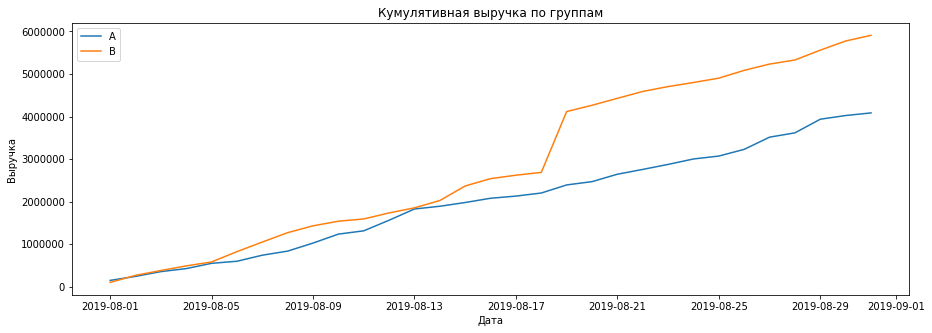

In [7]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('Кумулятивная выручка по группам')
plt.legend(); 

# Вывод

Выручка по группам растет в течение всего теста.
Однако график выручки группы В резко растет один раз. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.

### Кумулятивный средний чек по группам

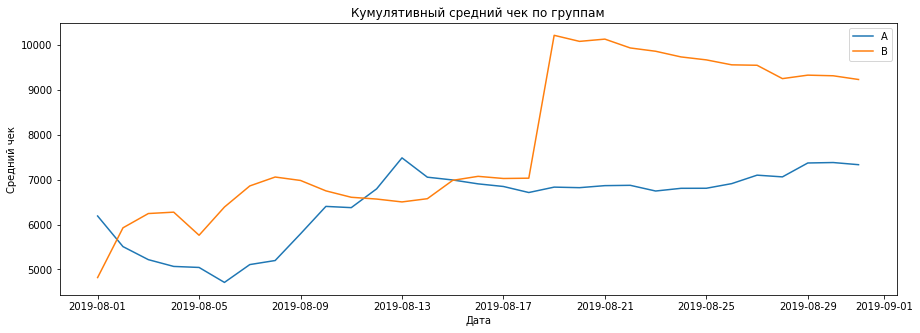

In [8]:
plt.figure(figsize=(15, 5))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.title('Кумулятивный средний чек по группам')
plt.legend(); 

# Вывод

В целом средний чек  по группам растет в течение всего теста, средний чек группы А в начале теста падал, но затем планомерно рос. Чек группы Б постоянно рост, но наблюдается резкий скачок, а потом медленное сниженее, что логично, после резкого всплеска.  Причина может быть та же самая - число заказов, либо  появление очень дорогих заказов в выборке

### График относительного изменения кумулятивного среднего чека группы B к группе A.

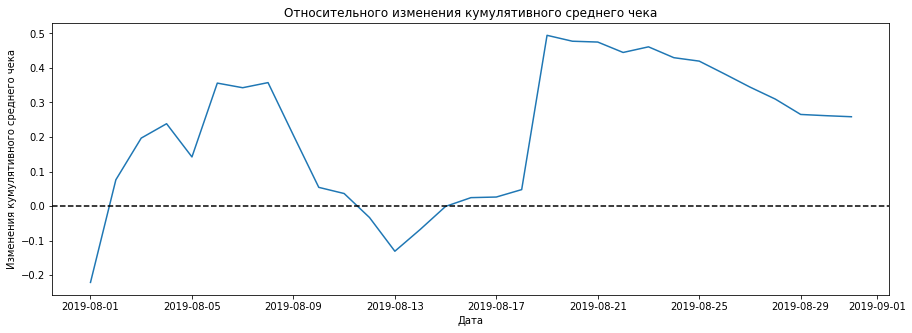

In [9]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивного среднего чека')
plt.title('Относительного изменения кумулятивного среднего чека');

# Вывод

Можно сказать, что средний чек группы Б был больше группы А на протяжении всего теста, но есть резкий всплеск, в котором надо разобраться.

###  График кумулятивной конверсии по группам

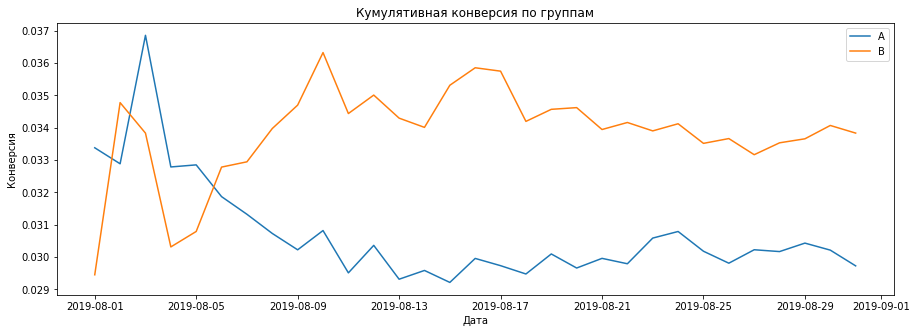

In [10]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']
plt.figure(figsize=(15, 5))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xlabel('Дата')
plt.ylabel('Конверсия')
plt.title('Кумулятивная конверсия по группам')
plt.legend();


# Вывод

Заметно, что конверсия группы А сразу начинает падать, в то время как группы Б повысилась и держиться на 1 уровне, немного снижаясь

### График относительного изменения кумулятивной конверсии группы B к группе A

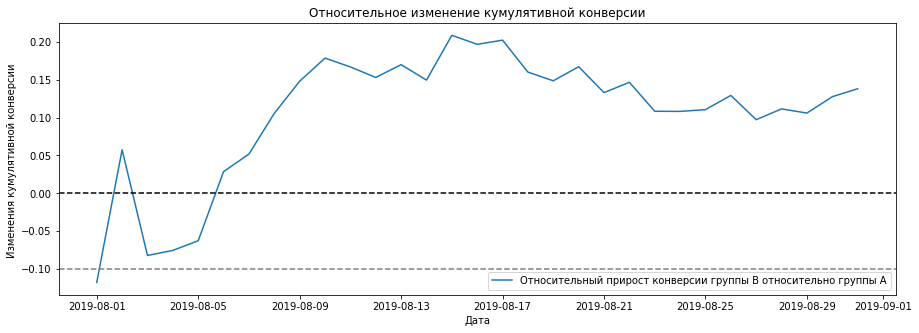

In [11]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
plt.figure(figsize=(15, 5))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.xlabel('Дата')
plt.ylabel('Изменения кумулятивной конверсии ')
plt.title('Относительное изменение кумулятивной конверсии');

# Вывод

Конверсия группы Б значительно превышает конверсию группы А

### График количества заказов по пользователям 

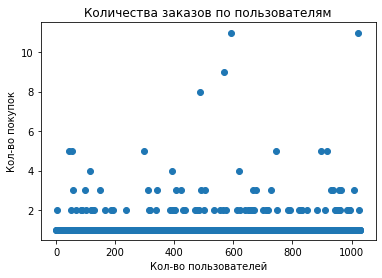

In [12]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)

ordersByUsers.columns = ['visitorId', 'transactionId']
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['transactionId']) 
plt.xlabel('Кол-во пользователей')
plt.ylabel('Кол-во покупок')
plt.title('Количества заказов по пользователям');

#  Вывод

Есть аномалии, но надо определить границу аномалий

### 95-й и 99-й перцентили количества заказов на пользователя

In [13]:
print(np.percentile(ordersByUsers['transactionId'], [90, 95, 99])) 

[1. 2. 4.]


2 - нижняя граница все что выше отсееваем т.к аномалии 

### Точечный график стоимостей заказов 

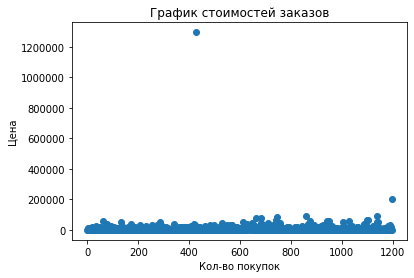

In [14]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Кол-во покупок')
plt.ylabel('Цена')
plt.title('График стоимостей заказов');

###  95-й и 99-й перцентили стоимости заказов

In [15]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


#  Вывод

Все, что выше 28000 - считаем аномалиями, такая аномалия только одна, заказ на сумму более 120 тысяч, видимо это и есть объяснение резкого скачка в графиках.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [16]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

sampleA = pd.concat(
    [
        ordersByUsersA['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.008
0.138


In [17]:
orders = pd.read_csv('/datasets/orders.csv', sep=',')
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors = pd.read_csv(
    '/datasets/visitors.csv', sep=','
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [18]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

In [19]:
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [20]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [21]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId']

Выдвигаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Соответственно, алтернативная гипотеза будет звучать - статистически значимые различия в конверсии между группами есть

In [22]:
sampleA = pd.concat(
    [
        ordersByUsersA['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.008
0.138


#  Вывод

0.008 значительно меньше 0.05, значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет - отвергаем. Относительное преимущество группы B равно 13.8% 

### Статистическая  значимость различий в среднем чеке заказа между группами по «сырым» данным

Выдвигаем нулевую гипотезу о том, что статистически значимых различий  в среднем чеке заказа между группами нет. Соответственно, алтернативная гипотеза будет звучать - статистически значимые различия  в среднем чеке заказа между группами есть

In [23]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


# Вывод

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B значительно выше среднего чека группы A.

### Статистическая значимость различий в конверсии между группами по «очищенным» данным

Выдвигаем нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет. Соответственно, алтернативная гипотеза будет звучать - статистически значимые различия в конверсии между группами есть

In [24]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > 4]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > 4]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 20000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='transactionId',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.011
0.149


#  Вывод

P-value значительно больше 0.05. Значит, можно сказать, что статистически значимых различий в конверсии между группами нет. Конверсия группы B значительно выше конверсии группы A, на 15%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Выдвигаем нулевую гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет. Соответственно, алтернативная гипотеза будет звучать - статистически значимые различий в среднем чеке заказа между группами по «очищенным» данным есть

In [25]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.433
-0.002


# Вывод

Гипотезу не можем отвергнуть, а вот средний чек группы B значительно понизился, даже упал относительного среднего чека группы A, но в целом, они могут считаться одинаковыми.

## Общий вывод

Передо мной стояла цель - выделить перспективные\ приоритетные гипотезы для дальнейших исследований и тестирования, провести тест и посмотреть, принесут ли измненеия значимые результаты.

Соответственно, я работал с данными по гипотезам и по целевым группам в рамках тестирования. В процессе анализа были найдены артефакты, были проведены тесты с "сырыми" данными и с очищенными, чтобы наглядно были видны результаты.

В ходе анализа я нашел: 
 - кумулятивную выручку по групппам - выручка по группам растет в течение всего теста. Однако график выручки группы В резко растет один раз.
 - кумулятивную конверсию - заметно, что конверсия группы А сразу начинает падать, в то время как группы Б повысилась и держиться на 1 уровне, немного снижаясь. 
  - кумулятивный средний чек по группам - в целом средний чек по группам растет в течение всего теста, средний чек группы А в начале теста падал, но затем планомерно рос. Чек группы Б постоянно рост, но наблюдается резкий скачок, а потом медленное сниженее, что логично, после резкого всплеска. 
  - относительное измненеие конверсии и среднего чека между группами - средний чек группы Б был больше группы А на протяжении всего теста, а конверсия группы Б значительно превышает конверсию группы А.
  - количество заказов пользователей - 95% пользователей сделали 2 заказа.
  - стоимость заказов - 95% пользователей сделали заказ на сумму не превышающую 28000.
  В ходе работы с "сырыми данными" обнаружил артефакты, и проанализировал те же показателями, но уже с очищенными данными. Проверил ряд гипотез: 
  - Можно сказать, что статистически значимых различий в конверсии между группами нет. Конверсия группы B значительно выше конверсии группы A, на 15%.
  - Мы не можем отвергнуть гипотезу о том, что статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет, а вот средний чек группы B значительно понизился, даже упал относительного среднего чека группы A, но в целом, они могут считаться одинаковыми.
  
Таким образом, резюмируя, можно сказать, что зафиксировать статистически значимых различий не получилось, поэтому считаю, что тест надо остановить.

<div style="border:solid green 2px; padding: 20px">
<b>Комментарии ревьюера</b>

Артем, в проекте выполнена основная часть работы, ты молодец!
    
С расчетами проблем не возникло, это отлично. Но для аналитика также важно, как он визуализирует полученные результаты для представления их коллегам или руководству, как он формулирует гипотезы и как их проверяет, как делает выводы. Поэтому проект еще нужно доработать:
- поработать с визуализацией и оформлением работы;
- добавить общий вывод по предобработке данных;
- обязательно добавить формулировку нулевой и альтернативной гипотез, которые ты проверяешь;
- подготовить общий вывод по работе;
- поработать с желтыми комментариями.    
    
Так что жду твою работу на повторное ревью. Буду рада вопросам, если они появятся :)

<div style="border:solid green 2px; padding: 20px">
<b>Комментарии ревьюера v2</b>

Артем, работа выполнена на хорошем уровне, так держать!

Ты молодец, что сопровождаешь все вычисления своими комментариями и пояснениями, сразу видно, что и зачем ты делаешь. Проект было очень приятно проверять :)

Хотела отметить, что ты очень грамотно используешь методы pandas для работы с датафреймами, с проверкой и исследованием данных тоже все окей.

У тебя хорошо получается анализировать, развивайся в этом направлении. Для аналитика важно, какие выводы и заключения он делает по проведённым расчетам и тестам.

В этой работе у нас несколько проверок гипотез, так что можно было обернуть коды в функцию. Написание и использование функций очень удобно - с ними кода меньше, проверять работу легче, функции удобно тестировать. Этот навык точно пригодится тебе в следующих спринтах :)

По поводу графиков с первого раза все отлично, молодец! Могу еще посоветовать посмотреть библиотеку seaborn, там есть достаточно интересные варианты визуализации :) Вот этот ресурс https://python-graph-gallery.com, там много готовых решений. 

Успехов в выполнении следующих заданий!